# Poem Classification using Machine learning  

## 📌 Project Overview  

Poetry is a unique form of artistic expression, often encompassing deep emotions, vivid imagery, and rhythmic structures. This project aims to classify poems into one of four predefined genres using Natural Language Processing (NLP) and Deep Learning techniques.  

The four poem genres included in the dataset are:  
- **Affection** 💖 (Love, friendship, emotions)  
- **Environment** 🌿 (Nature, seasons, landscapes)  
- **Music** 🎵 (Melody, rhythm, musical themes)  
- **Death** ⚰️ (Loss, grief, mortality)  

We will build a deep learning model capable of understanding the thematic elements of poetry and classifying it into the appropriate genre.  

---

## 🎯 Project Objectives  

- **Text Preprocessing**: Cleaning poetry texts by removing special characters, stopwords, and performing tokenization.  
- **Feature Extraction**: Using word embeddings (Word2Vec, GloVe, or embeddings from Transformer models like BERT) to represent poems in a numerical format.  
- **Model Training**: Training a deep learning model (LSTM, BiLSTM, or Transformer-based models) to classify poems.  
- **Evaluation**: Assessing model performance using accuracy, F1-score, and confusion matrix.  
- **Deployment**: Integrating the trained model into a **Flask web application** for real-time poem classification.  
- **Model Tracking with MLflow**: Implementing **MLflow** to log experiment parameters, model performance, and facilitate reproducibility.  

---

## 📜 Dataset Details  

The dataset consists of poetry texts labeled into four categories: **Affection, Environment, Music, and Death**. Each poem undergoes preprocessing steps such as:  

- **Removing special characters & punctuation**  
- **Lowercasing text**  
- **Tokenization & stopword removal**  
- **Using word embeddings for numerical representation**  

---

## 🏗️ Model Training Workflow  

1. **Data Preprocessing**: Cleaning the text data and converting words into numerical embeddings.  
2. **Model Selection**: Experimenting with deep learning architectures like LSTM, BiLSTM, and Transformer-based models.  
3. **Training & Hyperparameter Tuning**: Optimizing model performance by fine-tuning hyperparameters.  
4. **Evaluation**: Comparing different models using evaluation metrics like accuracy, precision, recall, and F1-score.  
5. **Logging with MLflow**: Tracking model experiments, storing trained models, and comparing performance metrics.  
6. **Deployment**: Deploying the best-performing model as a **Flask web app** on **Render**.  

---

## 🛠️ Technologies Used  

- **Python (3.x)** 🐍  
- **TensorFlow/Keras** 🤖  
- **NLTK / SpaCy** (For text preprocessing)  
- **Word2Vec / GloVe / BERT** (For word embeddings)  
- **LSTM / BiLSTM / Transformers** (Deep Learning models)  
- **MLflow** (For experiment tracking)  
- **Flask** (For web application)  
- **Render** (For model deployment)  

---

## 🚀 Next Steps  

- Experiment with **BERT embeddings** for improved contextual understanding.  
- Compare performance with **CNN-based text classification models**.  
- Implement **attention mechanisms** to improve classification accuracy.  
- Deploy the model as an **interactive web app** for users to input poetry and get instant classification results.  

---

💡 **Let's get started with the Poem Classification project!** 🚀  

In [171]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# make with this report
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# preprocessing imports

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Alogrithim
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Hyperpearmeter turning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# text preprocessing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


## model accuary metrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## dorp the model in pickle
import pickle

## Tracking the Model
import mlflow
import mlflow.sklearn

from mlflow.models import infer_signature

Load the data

In [92]:
# Define column names
poem_df_1  = pd.read_csv("D:\\Poem-Classification\\data\\Poem_classification - train_data.csv")
poem_df_1 .head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [93]:
poem_df_2  = pd.read_csv("D:\\Poem-Classification\\data\\Poem_classification - test_data.csv")
poem_df_2 .shape

(150, 2)

In [94]:
# Combine both DataFrames by stacking rows
poem_df = pd.concat([poem_df_1, poem_df_2], axis=0, ignore_index=True)


In [95]:
poem_df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [96]:
poem_df['Genre'].value_counts()

Genre
Environment    252
Music          251
Death          247
Affection      241
Name: count, dtype: int64

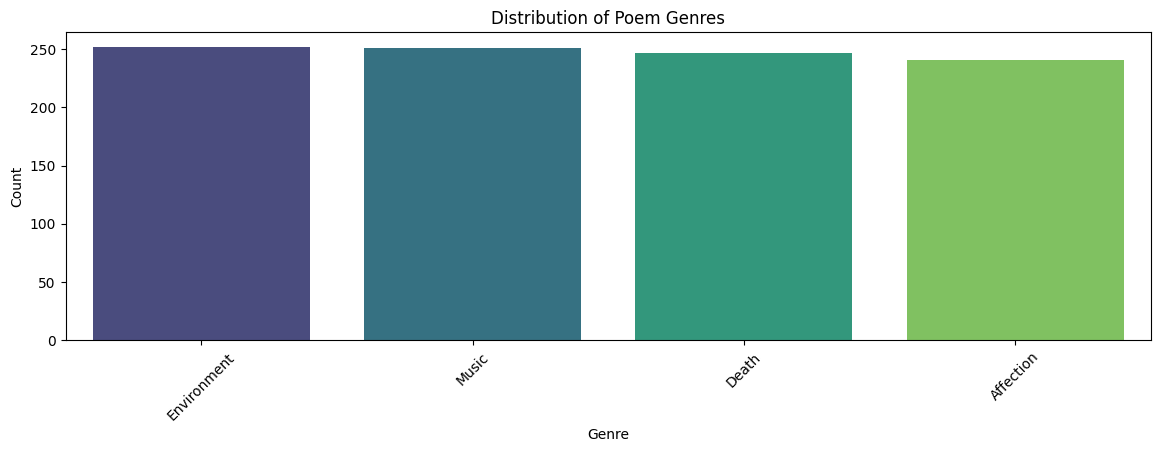

In [97]:
# Count the occurrences of each genre
genre_counts = poem_df['Genre'].value_counts()

# Plot the barplot
plt.figure(figsize=(14, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")

# Customize the plot
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Poem Genres")
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


In [98]:
poem_df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [99]:
poem_df.shape

(991, 2)

In [100]:
poem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   991 non-null    object
 1   Poem    987 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [101]:
## checking the values of the data
null_values = poem_df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Genre    0
Poem     4
dtype: int64


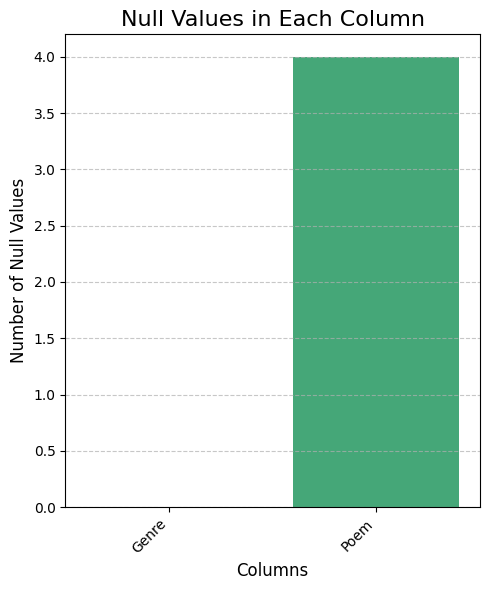

In [102]:
# Plot the null values
plt.figure(figsize=(5, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')

# Add plot labels and title
plt.title("Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
poem_df = poem_df.dropna()


In [104]:
poem_df.isnull().sum()

Genre    0
Poem     0
dtype: int64

In [105]:
# Check for duplicate rows in the entire dataframe
duplicates = poem_df[ poem_df.duplicated() ]

# If you want to check the number of duplicates
num_duplicates = poem_df.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 3


In [106]:
# Remove duplicate rows
poem_df = poem_df.drop_duplicates()

In [107]:
poem_df.duplicated().sum()

np.int64(0)

LabelEncoding

In [108]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to a categorical column (e.g., 'author_id')
poem_df['Genre'] = encoder.fit_transform(poem_df['Genre'])

In [109]:
poem_df.head()

,Genre,Poem
1,3,In the thick brushthey spend the...
2,3,Storms are generous. ...
3,3,—After Ana Mendieta Did you carry around the ...
4,3,for Aja Sherrard at 20The portent may itself ...
5,3,"for Bob Marley, Bavaria, November 1980 Here i..."


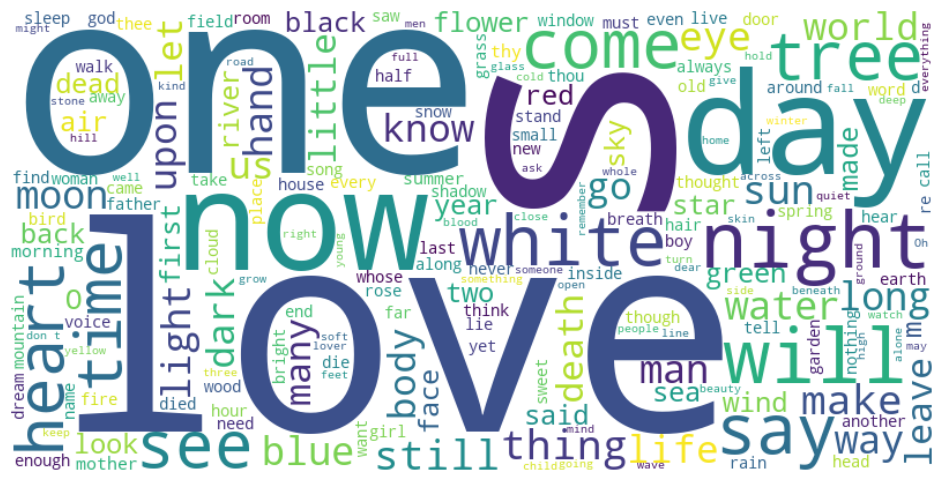

In [110]:
from wordcloud import WordCloud

# Assuming you have a column 'Tweet content' in your dataframe
text_data =poem_df['Poem'].dropna().str.cat(sep=' ')  # Combine all the tweets into one string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

In [111]:
poem_df['Poem'][10]

'"Save your hands,” my mother says, seeing me untwist a jar\'s tight cap—just the way she used to tell me not to let boys fool around, or feelmy breasts: "keep them fresh for marriage,” as if they were a pairof actual fruit. I scoffed to think they could bruise, scuff,soften, rot, wither. I look'

In [112]:
poem_df['Poem'][2]

'\xa0 \xa0Storms are generous.\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 Something so easy to surrender to, sitting by the window,\xa0and then you step out into the garden you were so bored of,\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0'

In [113]:
poem_df['Poem'] = poem_df['Poem'].str.lower()

Text preprocessing

In [114]:
import re
# Function to clean text using regex
def clean_text(text):
    if isinstance(text, str):  # Ensure it's a string
        text = re.sub(r'\s+', ' ', text.replace("\xa0", " ")).strip()  # Replace \xa0 and normalize spaces
    return text

# Apply cleaning to the column
poem_df['Poem'] = poem_df['Poem'].apply(clean_text)


In [115]:
poem_df['Poem'][167]

'the blue dress—died on august 6, 2015, along with the little blue flowers,all silent. once the petals looked up. now small pieces of dust. i wonderwhether they burned the dress or justthe body? i wonder who lifted her upinto the fire? i wonder if her hair'

Remove the puncturation

In [116]:
import string
exclude  = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [117]:
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [118]:
# Remove punctuation from the 'Text' column
poem_df['Poem'] = poem_df['Poem'].apply(lambda x: x.translate(str.maketrans('', '', exclude)))

In [119]:
poem_df['Poem'][2]

'storms are generous something so easy to surrender to sitting by the window and then you step out into the garden you were so bored of'

# Removeing the stop words

In [120]:
# Download the stop words list
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
import nltk
nltk.download('punkt')  # This downloads the tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [122]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'Text' column
poem_df['Poem'] = poem_df['Poem'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [123]:
poem_df['Poem'][124]

'long ago met beautiful boytogether sleptin mothers womb street fathersrises eat everything black forbidden edenin arms brother sleeps teeth pearlsi give away night slumber give away man made whitei give away'

In [124]:
# Define preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing
poem_df['Poem'] = poem_df['Poem'].apply(preprocess_text)


In [125]:
poem_df['Poem'][3]

'—after ana mendieta carry around matin star hold forestfire one hand would wake radiate shimmer gleam lucerolight morning would measure wingspan idea taking off— night would'

In [126]:
# # Remove "- exrate" from the text
# poem_df['Poem'] = poem_df['Poem'].str.replace(r"-\s*", "", regex=True)
# Remove the em dash (—) from the text
poem_df['Poem'] = poem_df['Poem'].str.replace(r"—", "", regex=True)

In [127]:
poem_df['Poem'][3]

'after ana mendieta carry around matin star hold forestfire one hand would wake radiate shimmer gleam lucerolight morning would measure wingspan idea taking off night would'

In [128]:
# Function to split joined words
def split_joined_words(text):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', text)  # Insert space before capital letters

# Apply function to the DataFrame
poem_df['Poem'] = poem_df['Poem'].apply(split_joined_words)

In [129]:
poem_df['Poem'][124]

'long ago met beautiful boytogether sleptin mothers womb street fathersrises eat everything black forbidden edenin arms brother sleeps teeth pearlsi give away night slumber give away man made whitei give away'

In [130]:
import pandas as pd
import wordninja  # Best for smart word segmentation

# Function to split joined words
def split_words(text):
    return " ".join(wordninja.split(text))

# Apply function to the entire column
poem_df['Poem'] = poem_df['Poem'].apply(split_words)

In [131]:
# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Apply stemming to the 'text' column
poem_df['Poem'] = poem_df['Poem'].apply(lambda x: stemmer.stem(x))

In [132]:
poem_df['Poem'][4]

'aja s her rard 20 the portent may memory wallace steven show hard carry scores adults back not look carrion s need distress of loyalty requires pain'

In [136]:
poem_df['Poem'][8]

'for sixty seven pound nugget lake superior copper found iowa cornfield earliest flute carved vulture wing we what were bowed moon balmy secular night'

In [138]:
poem_df.head()

,Genre,Poem
1,3,thick brush they spend hottest part day soakin...
2,3,storms generous something easy surrender sitti...
3,3,after an a men diet a carry around matin star ...
4,3,aja s her rard 20 the portent may memory walla...
5,3,bob marley bavaria november 1980 brilliant mor...


In [156]:
import inflect

p = inflect.engine()
poem_df['Poem'] = poem_df['Poem'].apply(lambda x: re.sub(r'\d+', lambda m: p.number_to_words(m.group()), x))


In [157]:
poem_df['Poem'][90]

'know knowhow shame obedience the long chain tethering lawn mower to fence garden are chrysanthemums he m of lace headscarf i loose choosing around throat still twines thin line from another life was guillotined know knowhow slap'

In [158]:
# Drop column 'B'
X = poem_df.drop('Genre', axis=1)
y = poem_df['Genre'] 

In [159]:
X.head()

,Poem
1,thick brush they spend hottest part day soakin...
2,storms generous something easy surrender sitti...
3,after an a men diet a carry around matin star ...
4,aja s her rard twenty the portent may memory w...
5,"bob marley bavaria november one thousand, nine..."


In [160]:
y

1      3
2      3
3      3
4      3
5      3
      ..
986    2
987    2
988    2
989    2
990    2
Name: Genre, Length: 984, dtype: int64

In [162]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (984, 1) , shape : (984,) 


In [163]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
X_train.head()

,Poem
969,nature seems work slugs leave lair
768,pip pear blackbird tussle grass grackle offici...
338,shake notebook empty pages say every word dead...
896,business thou plague pleasure life thou charmi...
535,door opened saw there and first time heard spe...


In [165]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (787, 1) X_test shape : (197, 1) y_train shape : (787,) y_test shape :  (197,)


In [166]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Text preprocessing using TfidfVectorizer
        ('text', TfidfVectorizer(max_features=5000),'Tweet content'),
    ]
)

In [167]:
preprocessor.fit

<bound method ColumnTransformer.fit of ColumnTransformer(transformers=[('text', TfidfVectorizer(max_features=5000),
                                 'Tweet content')])>

In [173]:
classifiers_model = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}


In [174]:

# Training and Evaluating All Models
best_model = None
best_score = 0
best_model_name = ""
predictions = {}  # Dictionary to store predictions for each model

for name, (clf, param_grid) in classifiers_model.items():
    try:
        # Create a pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        
        # Randomized Search for Hyperparameter Tuning
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=10,
            scoring='f1_weighted',
            cv=3,
            random_state=42,
            verbose=1,
            n_jobs=-1
        )
 


       # Fit the model
        random_search.fit(X_train, y_train)
        
        # Evaluate the model
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)
        predictions[name] = y_pred  # Store predictions


        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        # Update best model
        if f1 > best_score:
            best_model = best_estimator
            best_score = f1
            best_model_name = name
        best_params = random_search.best_params_
        # Print results for current model
        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {random_search.best_params_}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 80)
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Display the best model overall
print(f"\nBest Model: {best_model_name}")
print(f"Best F1 Score: {best_score:.2f}")

TypeError: cannot unpack non-iterable LogisticRegression object